# Internship Task

In [2]:
!pip install imbalanced-learn


In [3]:
!pip install tensorflow



In [4]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [6]:
!pip uninstall imbalanced-learn -y



Found existing installation: imbalanced-learn 0.12.3
Uninstalling imbalanced-learn-0.12.3:
  Successfully uninstalled imbalanced-learn-0.12.3


In [7]:
!pip install imbalanced-learn


  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/5a/fa/267de06c95210580f4b82b45cec1ce1e9ce1f21a01a684367db89e7da70d/imbalanced_learn-0.12.3-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.12.3-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.12.3-py3-none-any.whl (258 kB)


In [8]:
# Load the dataset
df = pd.read_csv('Fraud.csv')

# Display the first few rows
df.head()

# Summary statistics
df.describe()

df.shape

df.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [9]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow as tf

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')


# 1.Data cleaning including missing values, outliers and multi-collinearity.
df.isnull().sum() # NO missing values. Now we’ll values for few columns


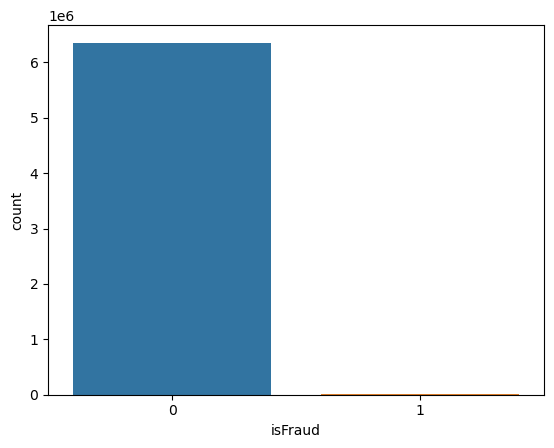

In [61]:

# Check the distribution of the target variable
sns.countplot(x='isFraud', data=df)
plt.show()

In [13]:
df.nameOrig.value_counts()


#df.isFlaggedFraud.value_counts()
#df.isFraud.value_counts()


nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64

In [14]:
df.nameDest.value_counts()


nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64

In [15]:
df.type.value_counts()


type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [16]:
df.isFlaggedFraud.value_counts()


isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [17]:
df.isFraud.value_counts()


isFraud
0    6354407
1       8213
Name: count, dtype: int64

# Exploratory Analysis and Visualization


Univariate analysis is used to analyze the data.

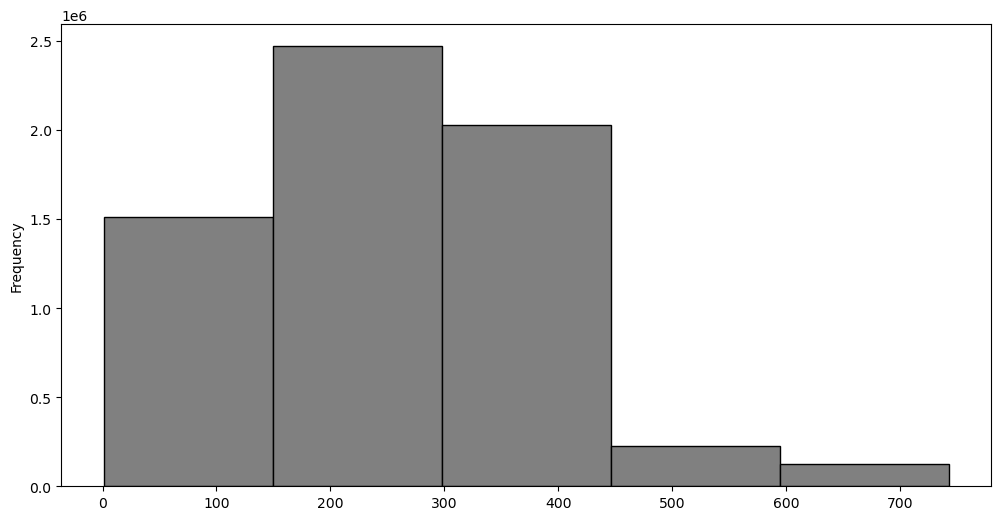

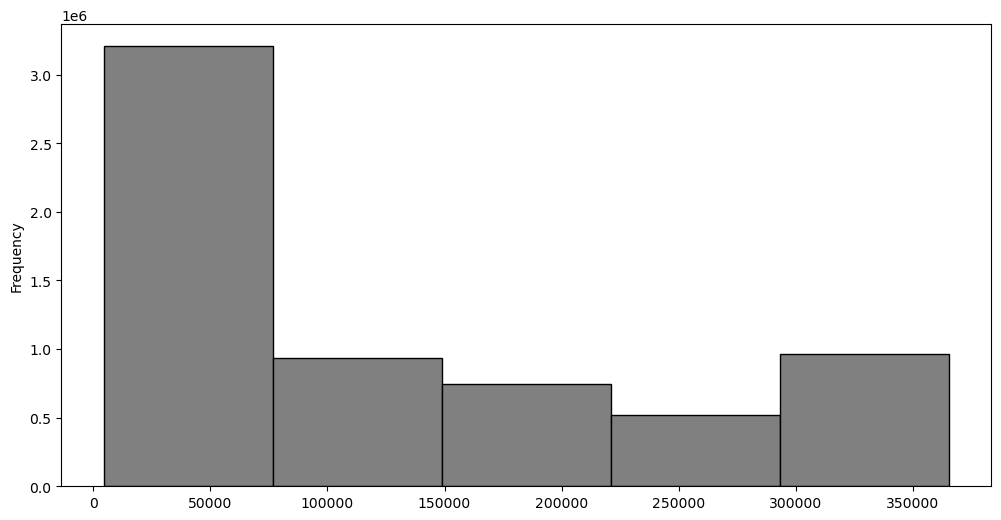

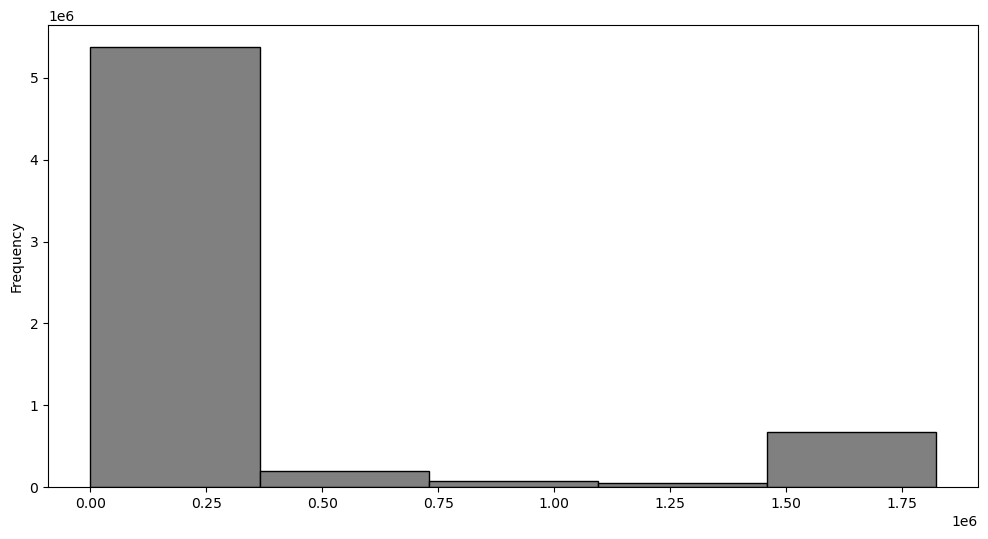

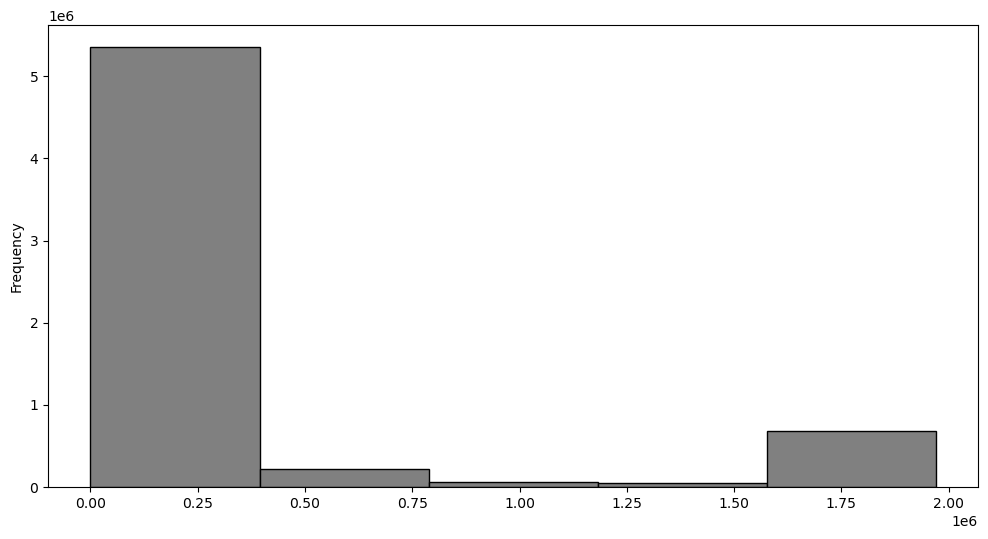

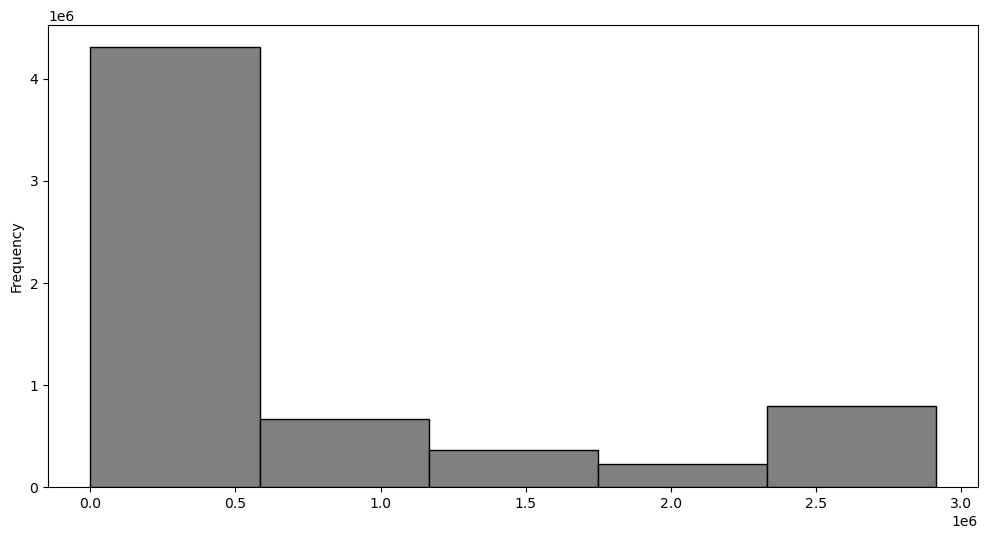

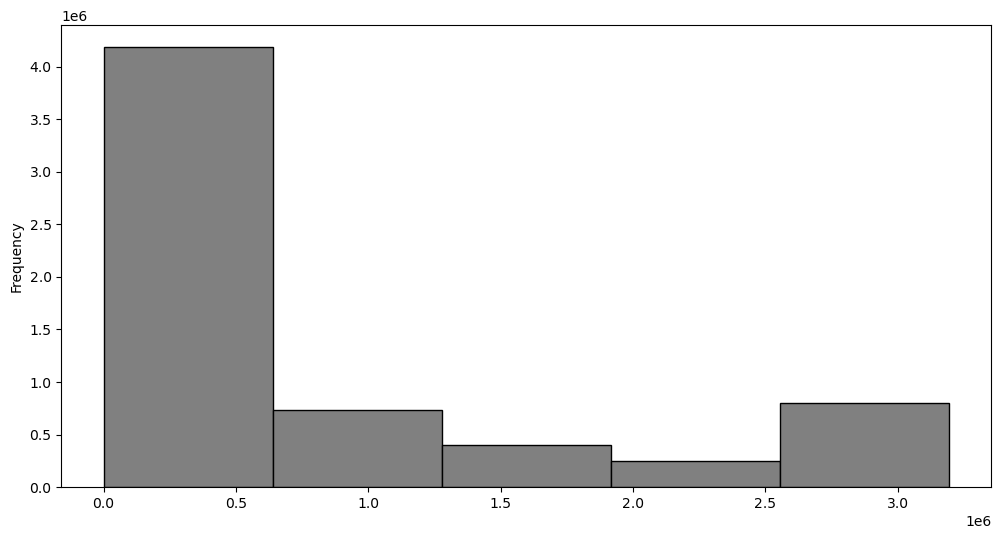

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

feature=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    df[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='grey',edgecolor='black')
    plt.show()

# we could see some outliers  so using Quantile-based Flooring and Capping for these columns.

In [19]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    print(i)
    print(df[i].quantile(0.10))
    print(df[i].quantile(0.90))

    print('\n')

amount
4501.3
365423.30900000007


oldbalanceOrg
0.0
1822508.289000007


newbalanceOrig
0.0
1970344.7930000005


oldbalanceDest
0.0
2914266.6690000016


newbalanceDest
0.0
3194869.671000002




In [20]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    lower = df[i].quantile(0.10)
    upper = df[i].quantile(0.90)
    df[i] = np.where(df[i] <lower, lower,df[i])
    df[i] = np.where(df[i] >upper, upper,df[i])
    print('Feature: ',i)
    print('Skewness value: ',df[i].skew())
    print('\n')

Feature:  amount
Skewness value:  0.8046460444556197


Feature:  oldbalanceOrg
Skewness value:  2.249361299814406


Feature:  newbalanceOrig
Skewness value:  2.2262847493216786


Feature:  oldbalanceDest
Skewness value:  1.4173123924260833


Feature:  newbalanceDest
Skewness value:  1.3593024983493058




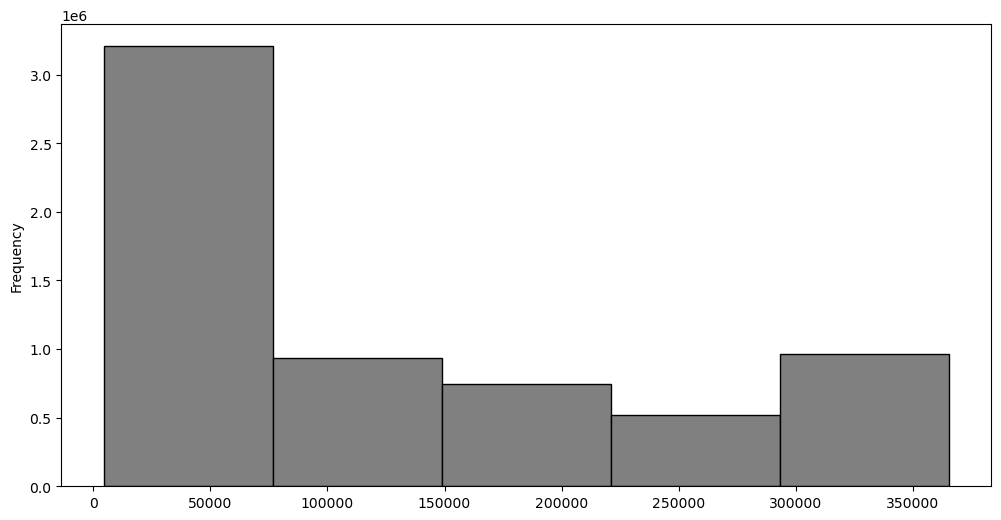

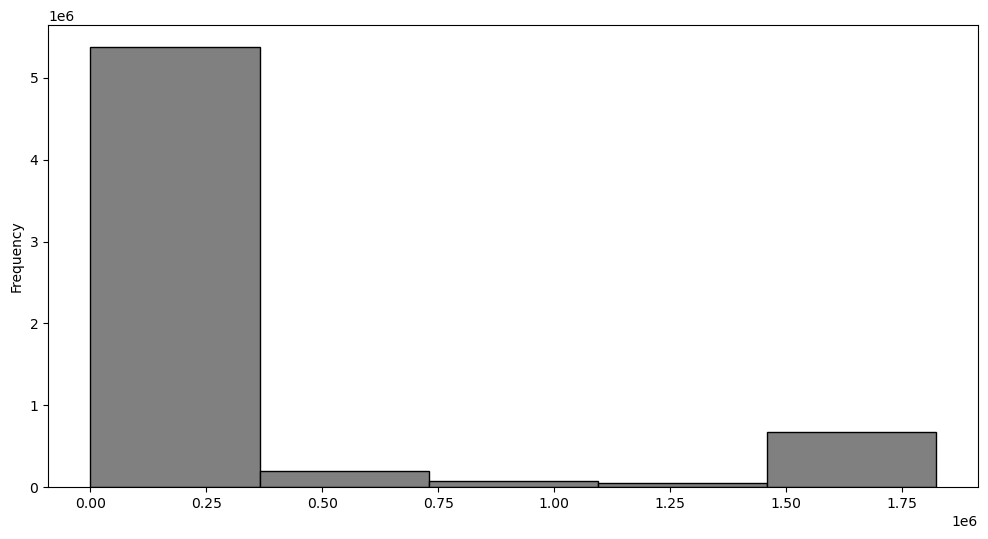

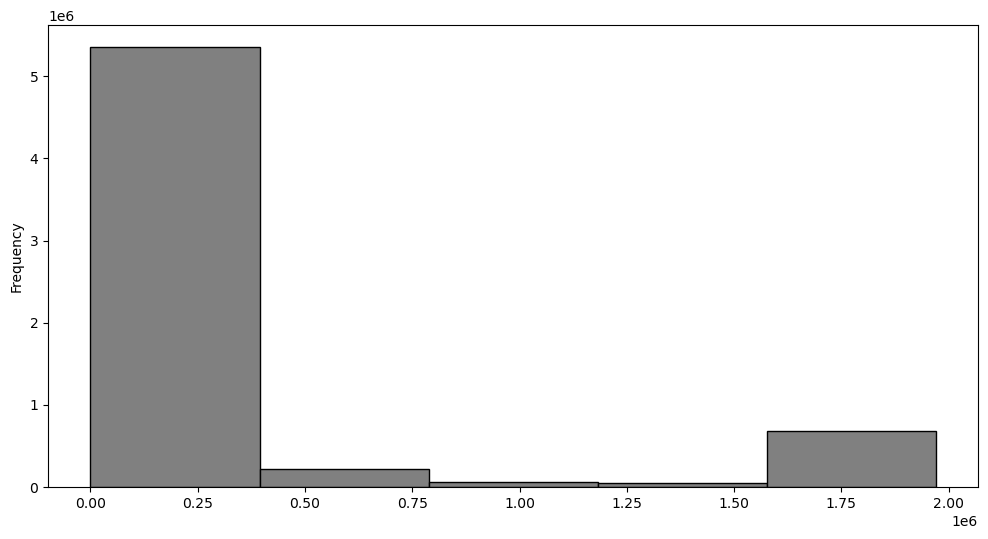

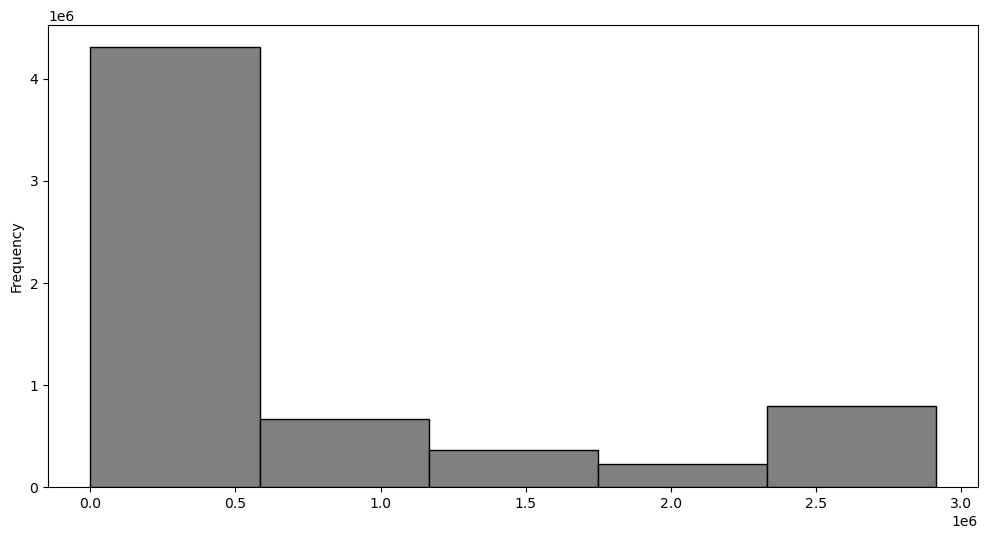

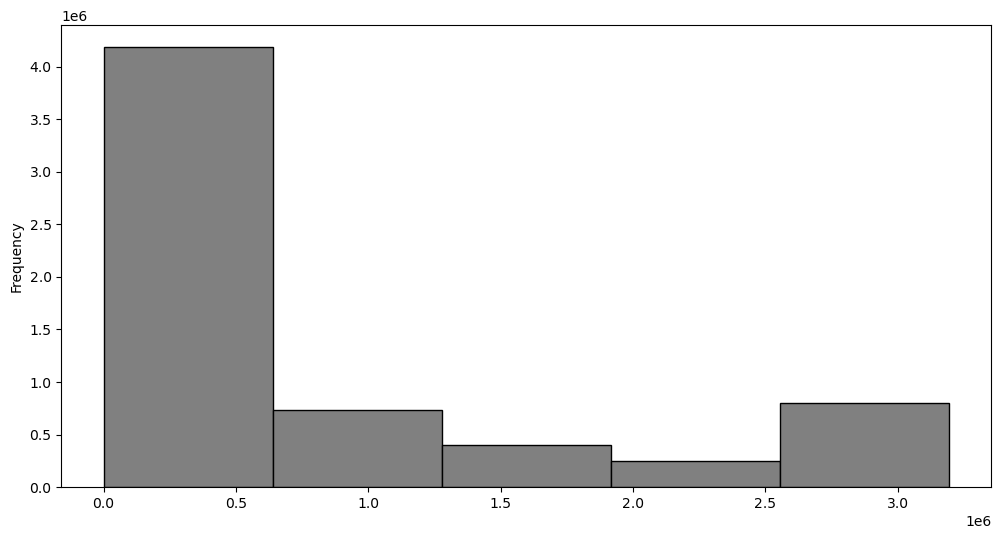

In [21]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    df[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='grey',edgecolor='black')
    plt.show()

#We have a maximum set of distribution between 150 to 400 of step
Amount: 0–35 lakhs with more values ranging between 0–75000. 
OldbalanceOrg : 0–18 lakh with more frequency around 0–375000
NewbalanceOrig: 0–19 lakh with more frequency around 0–375000
OldbalanceDest : 0–29 lakh with common values around 0–625000
NewbalanceDest : around 0–35 lakh with common values around 0–625000

<Axes: ylabel='type'>

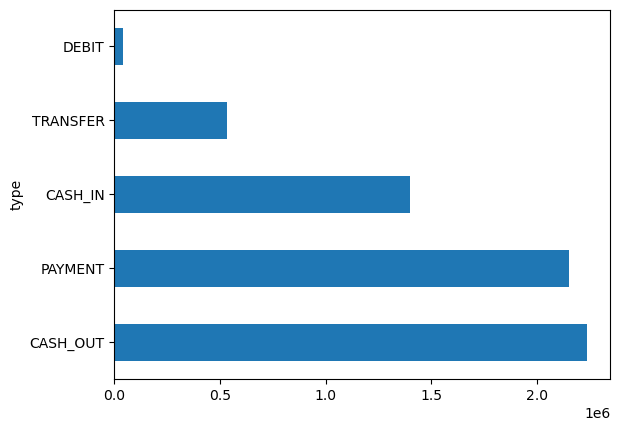

In [22]:
payment = df.type.value_counts()
payment.plot(kind='barh')


<Axes: xlabel='type', ylabel='count'>

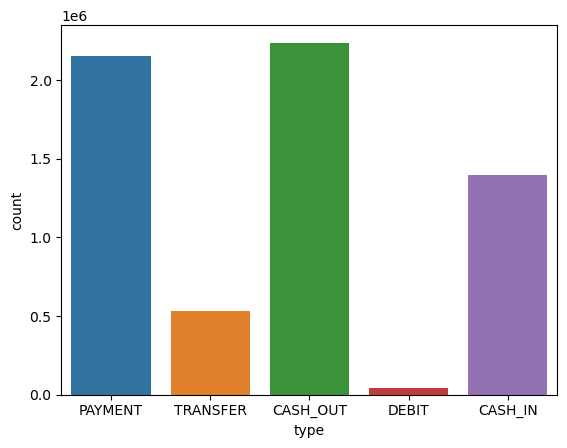

In [23]:
sns.countplot(x='type', data=df)


In [24]:
CrosstabResult=pd.crosstab(index=df.type,columns=df.isFraud)
CrosstabResult

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


<Axes: xlabel='type'>

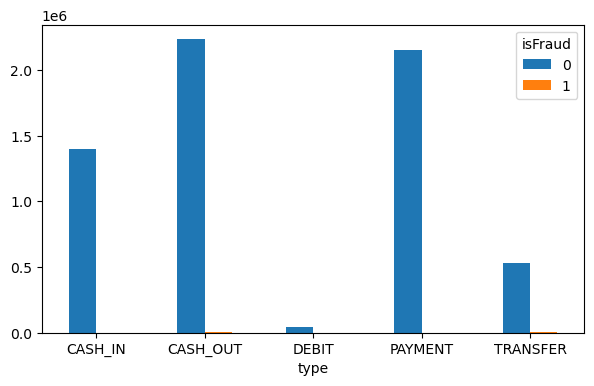

In [25]:
# Grouped bar chart between TYPE and ISFRAUD 
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

(3500.0, 7000.0)

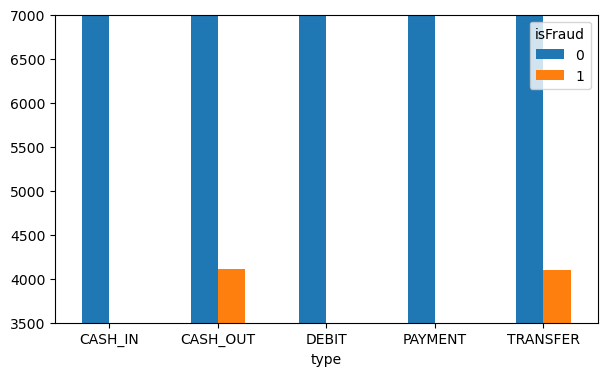

In [26]:
#Grouped bar chart between TYPE and ISFRAUD by changing ylimit to view isFraud values
CrosstabResult.plot.bar(figsize=(7,4), rot=0)
plt.ylim([3500, 7000])

In [27]:
cashout=2233384+4116
cashout_fraud= 4116/(cashout) * 100
cashout_fraud

0.18395530726256984

In [28]:
transfer= 528812+4097
transfer_fraud = 4097/(transfer) * 100
transfer_fraud

0.7687991758442811

In [29]:
transfer= 528812+4097
transfer_fraud = 4097/(transfer) * 100
transfer_fraud

0.7687991758442811

<Axes: ylabel='amount'>

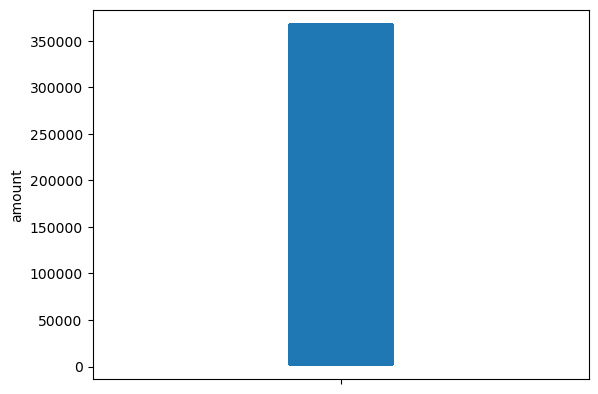

In [30]:
# plt.figure(figsize=(10,10))
sns.stripplot(y=df.amount)

In [31]:
print('Minimum: ',df.amount.min())
print('Maximum: ',df.amount.max())#Lowest amount transaction starts from 4500 and highest amount transaction goes upto 3.6 lakh

Minimum:  4501.3
Maximum:  365423.30900000007


<Axes: title={'center': 'amount'}, xlabel='isFraud'>

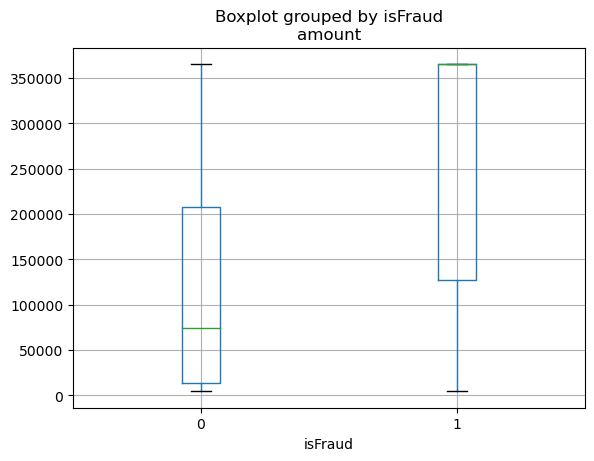

In [32]:
df.boxplot(column='amount', by='isFraud')


In [ ]:
#Fraud amount transaction range is between 1.3–3.6 lakh using boxplot

In [33]:
flagged_fraud_records = df[(df.isFraud==1) & (df.isFlaggedFraud==1)]
flagged_fraud_records

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,365423.309,C728984460,1822508.289,1970344.793,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,365423.309,C1100582606,1343002.080,1343002.080,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,365423.309,C1035541766,536624.410,536624.410,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,365423.309,C908544136,1822508.289,1970344.793,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,365423.309,C689608084,1822508.289,1970344.793,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,365423.309,C452586515,1822508.289,1970344.793,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,365423.309,C193696150,1822508.289,1970344.793,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.220,C1684585475,353874.220,353874.220,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,365423.309,C786455622,1822508.289,1970344.793,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,365423.309,C19004745,1822508.289,1970344.793,C1806199534,0.0,0.0,1,1


In [56]:
total_fraud= df[df.isFraud ==1]
total_fraud = total_fraud.shape[0]
total_fraud         

8213

In [57]:
total_isflaggedFraud= flagged_fraud_records.shape[0]
total_isflaggedFraud

16

In [58]:
flagged_percent = total_isflaggedFraud/total_fraud * 100
print('Percentage of flagged fraud: ',round(flagged_percent,3))

unflagged_percent= (total_fraud-total_isflaggedFraud)/total_fraud * 100
print('Percentage of incorrectly flagged fraud: ',round(unflagged_percent,3))
#percentage of records which are flagged as fraud is 0.195% which is very very less.

Percentage of flagged fraud:  0.195
Percentage of incorrectly flagged fraud:  99.805


In [34]:
fraud_min_max = [
    ['amount', df.amount.min(), df.amount.max()],
    ['oldbalanceOrg', df.oldbalanceOrg.min(), df.oldbalanceOrg.max()],
    ['newbalanceOrig', df.newbalanceOrig.min(), df.newbalanceOrig.max()],
    ['oldbalanceDest', df.oldbalanceDest.min(), df.oldbalanceDest.max()],
    ['isFraud', df.isFraud.min(), df.isFraud.max()]
] 

print(
    tabulate(
        fraud_min_max,
        headers=['columns', 'min value', 'max value'],
        showindex=True,
        tablefmt='github',
        numalign='right'
    )
)

|    | columns        |   min value |   max value |
|----|----------------|-------------|-------------|
|  0 | amount         |      4501.3 |      365423 |
|  1 | oldbalanceOrg  |           0 | 1.82251e+06 |
|  2 | newbalanceOrig |           0 | 1.97034e+06 |
|  3 | oldbalanceDest |           0 | 2.91427e+06 |
|  4 | isFraud        |           0 |           1 |


In [35]:
# Downcast numerical columns with smaller dtype
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = pd.to_numeric(df[col], downcast='float')
    if df[col].dtype == 'int64':
        df[col] = pd.to_numeric(df[col], downcast='unsigned')

# Use category dtype for categorical column
df['type'] = df['type'].astype('category')

df['step'].value_counts()


step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Number of transactions')

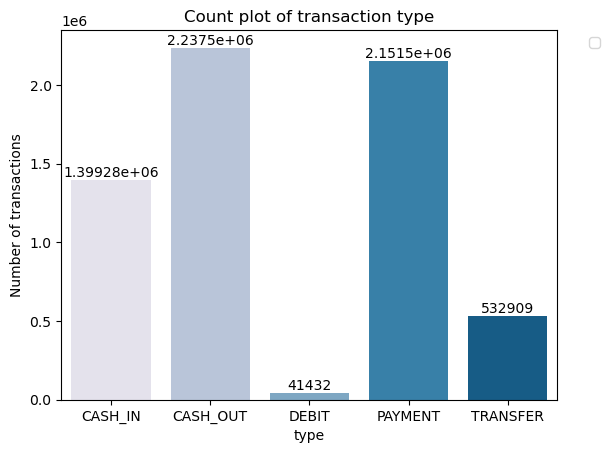

In [36]:
ax = sns.countplot(x='type', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of transaction type')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

Cash out is the most numerous transaction type, followed by payment, cash in, transfer and debit types.

Text(0.5, 1.0, 'Distribution of transaction amount')

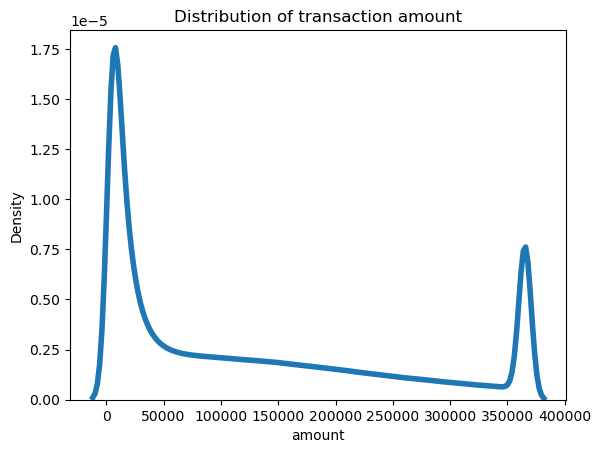

In [37]:
sns.kdeplot(df['amount'], linewidth=4)
plt.title('Distribution of transaction amount')

The distribution of transaction amounts is right skewed.
This indicates that most values are clustered around the left tail of the distribution, with the longer right tail.
(mode < median < mean)

In [38]:
df['nameOrig'].value_counts()


nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64

Text(0.5, 1.0, 'Distribution of transaction amount')

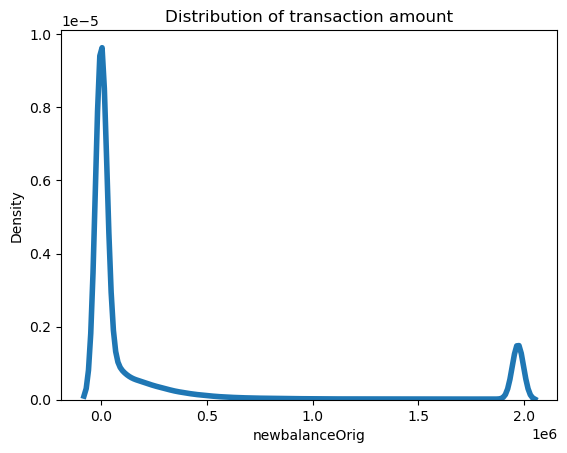

In [39]:
sns.kdeplot(df['newbalanceOrig'], linewidth=4)
plt.title('Distribution of transaction amount')

The distribution of post-transaction balances of the recipient is right skewed

#  Bivariate data visualization


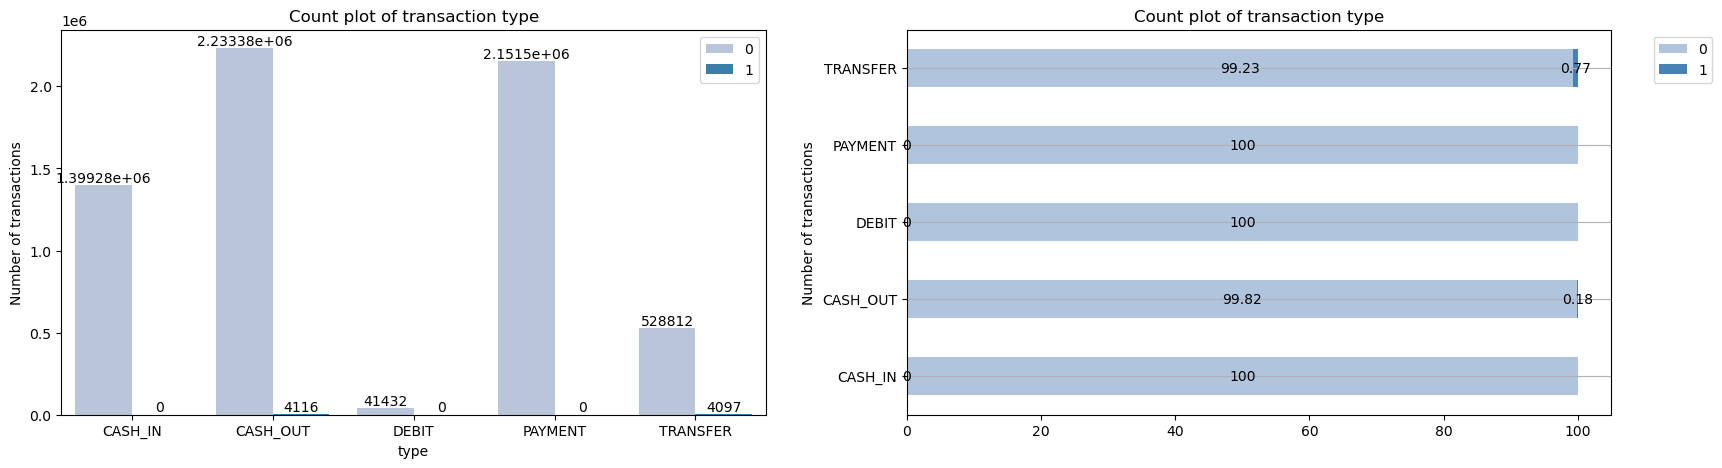

In [40]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(x='type', data=df, hue='isFraud', palette='PuBu', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)
ax[0].set_title('Count plot of transaction type')
ax[0].legend(loc='best')
ax[0].set_ylabel('Number of transactions')

df2 = df.groupby(['type', 'isFraud']).size().unstack()
df2.apply(lambda x : round(x/sum(x)*100, 2), axis=1).plot(kind='barh', stacked=True, color=['lightsteelblue', 'steelblue'], ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='center')
ax[1].set_title('Count plot of transaction type')
ax[1].legend(bbox_to_anchor=(1.05,1), loc='upper left')
ax[1].set_ylabel('Number of transactions')
ax[1].grid(axis='y')  #Fraudulent transactions only occur in debit and transfer types.

Text(0, 0.5, 'Number of transactions')

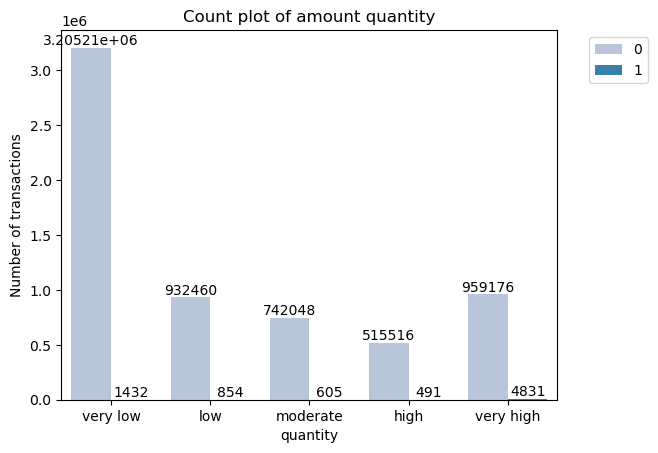

In [41]:
df['quantity'] = pd.cut(df['amount'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='quantity', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of amount quantity')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions') 

#Initial customers with very low pre-transaction balances has the highest number of fraudulent transactions.
This means that initial customers with very low pre-transaction balances may be more likely to fall for a fraudulent transaction.

In [ ]:
#All fraudulent transactions fall into the category of very low amounts.
#This suggests that in most cases, small transactions are more prone to fraudulent transactions.

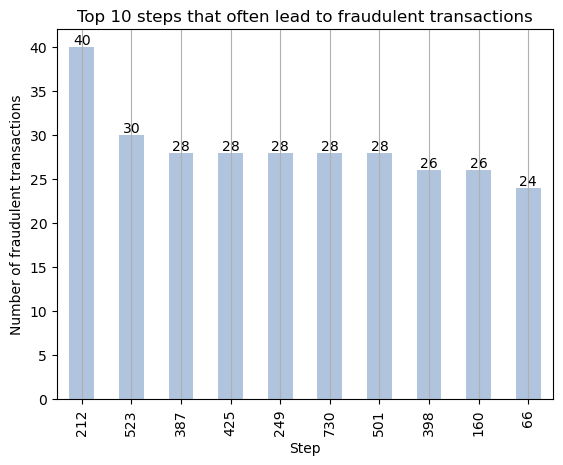

In [42]:
df1 = df[df['isFraud']==1]
df2 = df1['step'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 steps that often lead to fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Step')
plt.grid(axis='x')

del ax, df2

In [ ]:
#Step 212 has the highest number of fraudulent transactions, 40 cases.

Text(0.5, 0, 'Initial customers pre-transaction balance amount')

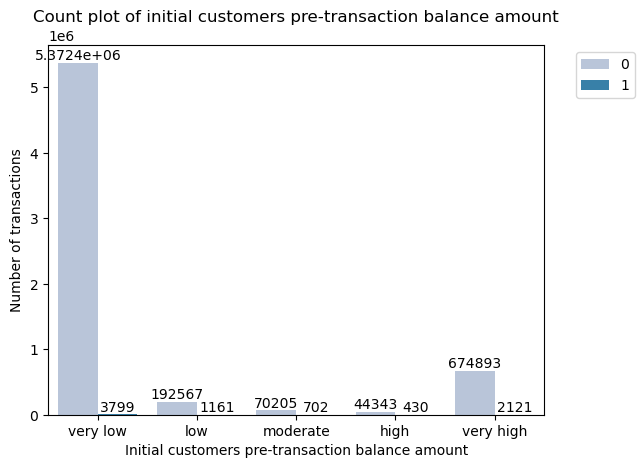

In [43]:
df['oldbalanceOrg_amt'] = pd.cut(df['oldbalanceOrg'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceOrg_amt', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of initial customers pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Initial customers pre-transaction balance amount')

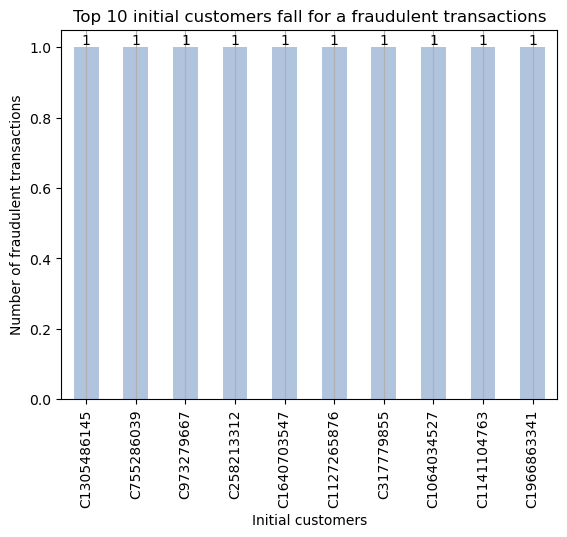

In [44]:
df2 = df1['nameOrig'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 initial customers fall for a fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Initial customers')
plt.grid(axis='x')

del ax, df2 #Initial customers are scammed of at most one for a fraudulent transaction.


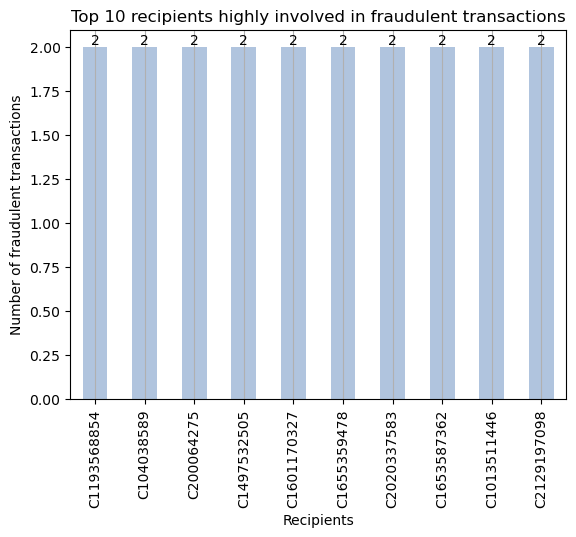

In [59]:
df2 = df1['nameDest'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 recipients highly involved in fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Recipients')
plt.grid(axis='x')

del ax, df2 #Suspicious recipients only have a maximum of 2 involved fraudulent transactions.

Text(0.5, 0, 'Recipient pre-transaction balance amount')

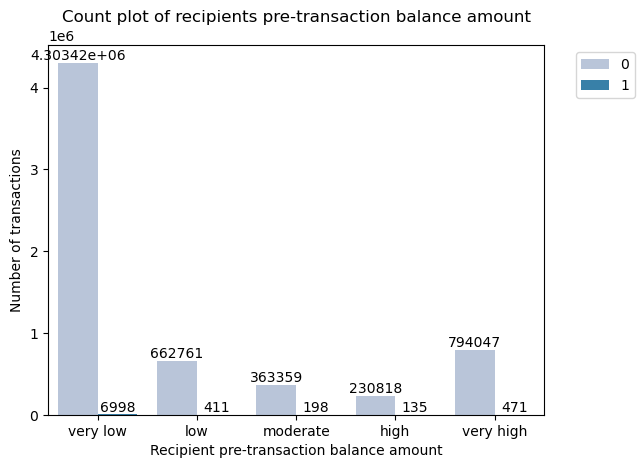

In [45]:
df['oldbalanceDest_amt'] = pd.cut(df['oldbalanceDest'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceDest_amt', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of recipients pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Recipient pre-transaction balance amount')

#Recipients with very low pre-transaction balances has the highest number of fraudulent transactions.

# Multivariate data visualization


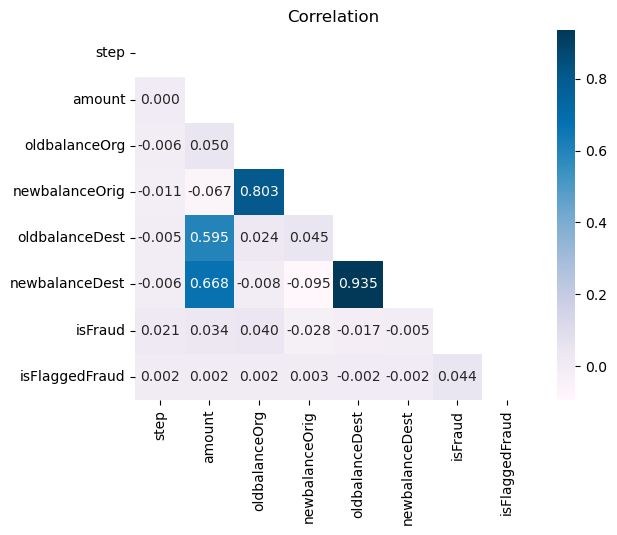

In [46]:
numeric_df = df.select_dtypes(include=[np.number])

 #Calculate the correlation matrix using Spearman correlation
corr_matrix = numeric_df.corr(method='spearman')

# Plot the heatmap
sns.heatmap(corr_matrix, 
            cbar=True, 
            annot=True, 
            mask=np.triu(np.ones_like(corr_matrix, dtype=bool)), 
            fmt='.3f', 
            cmap='PuBu')

plt.title('Correlation')
plt.show() 

#There is a high correlation between newbalanceOrig and oldbalanceOrg.Also, between newbalanceDest and oldbalanceDest.
oldbalanceOrg and newbalanceOrig has strong positive relationship.
oldbalanceDest and newbalanceDest has strong positive relationship.
oldbalanceOrg and amount has weak positive relationship.
newbalanceOrig and amount has moderate positive relationship.

#  Model Building
2. Describe your fraud detection model in elaboration.
Model Selection:
I’ll use a Random Forest model because it handles class imbalance well,
can capture complex interactions between features, and provides feature importance metrics, which are essential for interpreting the model
3. Variable Selection
Variables were selected based on the following criteria:

Domain Knowledge: Understanding which features are typically associated with fraudulent behavior (e.g.oldbalanceOrg).
Correlation Analysis: Dropping highly correlated features to avoid multicollinearity.
Feature Importance from Models: Using models like Random Forest to assess feature importance and remove non-significant variables.

In [47]:
# Data preprocessing
df['type'] = df['type'].map({'PAYMENT':0, 'CASH_IN':1, 'DEBIT':2, 'CASH_OUT':3, 'TRANSFER':4})

In [48]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc, ConfusionMatrixDisplay


seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)


X = df.copy()
X.drop(['nameOrig', 'newbalanceOrig', 'nameDest', 'newbalanceDest', 'quantity', 'oldbalanceOrg_amt', 'oldbalanceDest_amt'], axis=1, inplace=True)
y = X.pop('isFraud')


# Stratified train-test split
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train_idx, test_idx in skfold.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]


sc = StandardScaler()
scaled_train = sc.fit_transform(X_train)
scaled_test = sc.transform(X_test)
X_train = pd.DataFrame(scaled_train, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaled_test, index=X_test.index, columns=X_test.columns)


X_train, y_train = RandomUnderSampler(sampling_strategy='majority').fit_resample(X_train, y_train)

# 4. Demonstrating Model Performance
Performance is demonstrated using multiple metrics:

Confusion Matrix: Shows true positives, true negatives, false positives, and false negatives.
Classification Report: Provides precision, recall, F1-score, and support for each class.
ROC-AUC Curve: Evaluates the trade-off between the true positive rate and false positive rate across different thresholds.

In [49]:
def model_comparison_evaluate(classifiers, X, y):
    print('K-Fold Cross-Validation:\n')
    for name, model in classifiers.items():
        print('{}:'.format(name))
        
        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
        
        for score in scoring:
            scores = cross_val_score(model, X, y, scoring=score, cv=skfold, n_jobs=-1)
            print('Mean {} score: {:.3f} ({:.3f})'.format(score, scores.mean(), scores.std()))
            
        print('\n')

In [50]:
classifiers = { 'Random Forest Classifier':RandomForestClassifier(class_weight='balanced', random_state=seed),
                'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=seed)
              }

In [63]:
model_comparison_evaluate(classifiers, X_train, y_train)


K-Fold Cross-Validation:

Random Forest Classifier:
Mean accuracy score: 0.985 (0.003)
Mean precision score: 0.975 (0.006)
Mean recall score: 0.995 (0.001)
Mean f1 score: 0.985 (0.003)
Mean roc_auc score: 0.998 (0.001)


Logistic Regression:
Mean accuracy score: 0.874 (0.005)
Mean precision score: 0.890 (0.007)
Mean recall score: 0.853 (0.004)
Mean f1 score: 0.871 (0.005)
Mean roc_auc score: 0.951 (0.004)




Random Forest Classifier:
               precision    recall  f1-score   support

Non-Fraud [0]       1.00      0.97      0.99   1270881
    Fraud [1]       0.05      1.00      0.09      1643

     accuracy                           0.97   1272524
    macro avg       0.52      0.98      0.54   1272524
 weighted avg       1.00      0.97      0.99   1272524
 



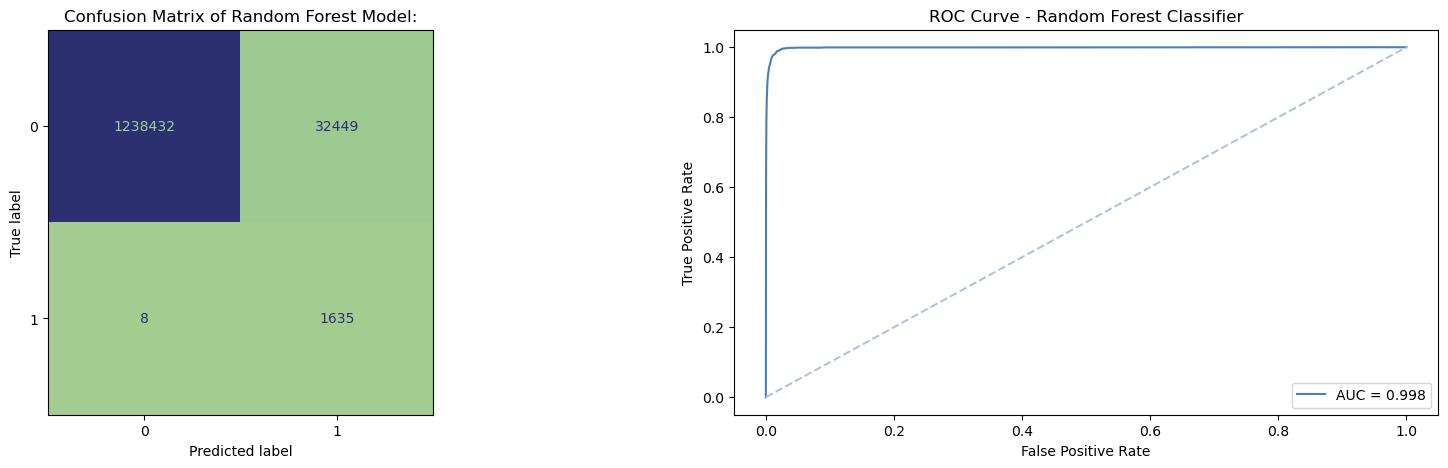

In [53]:
# Assuming you have defined X_train, X_test, y_train, y_test, and seed already

# Initialize and train the Random Forest model
model = RandomForestClassifier(class_weight='balanced', random_state=seed)
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)
y_pred_score = model.predict_proba(X_test)[:, 1]  # Get the probability scores for the positive class

# Print classification report
print('Random Forest Classifier:')
print(classification_report(y_test, y_pred, labels=[0, 1], target_names=['Non-Fraud [0]', 'Fraud [1]']), '\n')

# Plot the confusion matrix and ROC curve
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Confusion Matrix
ax[0].set_title('Confusion Matrix of Random Forest Model:')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False, values_format='', cmap='crest', ax=ax[0])
ax[0].grid(False)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)
roc_auc = auc(fpr, tpr)
ax[1].set_title('ROC Curve - Random Forest Classifier')
ax[1].plot(fpr, tpr, label='AUC = %0.3f' % roc_auc, color='steelblue')
ax[1].plot([0, 1], [0, 1], '--', color='lightsteelblue')  # Diagonal line (no-skill classifier)
ax[1].legend(loc='lower right')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')

plt.show()


In [54]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='roc_auc')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best AUC score: ", grid_search.best_score_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters found:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best AUC score:  0.9606723518414267


# 5. What are the key factors that predict fraudulent customer?
#This output tells you that "Type," "oldbalanceOrg," and "oldbalanceOrg" are among the top factors that the Random Forest model considers when predicting fraud.
#This can guide the company in understanding and mitigating fraud risk.

Top Features Predicting Fraud:
          Feature  Importance
1            type    0.334872
3   oldbalanceOrg    0.298691
2          amount    0.185712
0            step    0.103123
4  oldbalanceDest    0.077600
5  isFlaggedFraud    0.000002


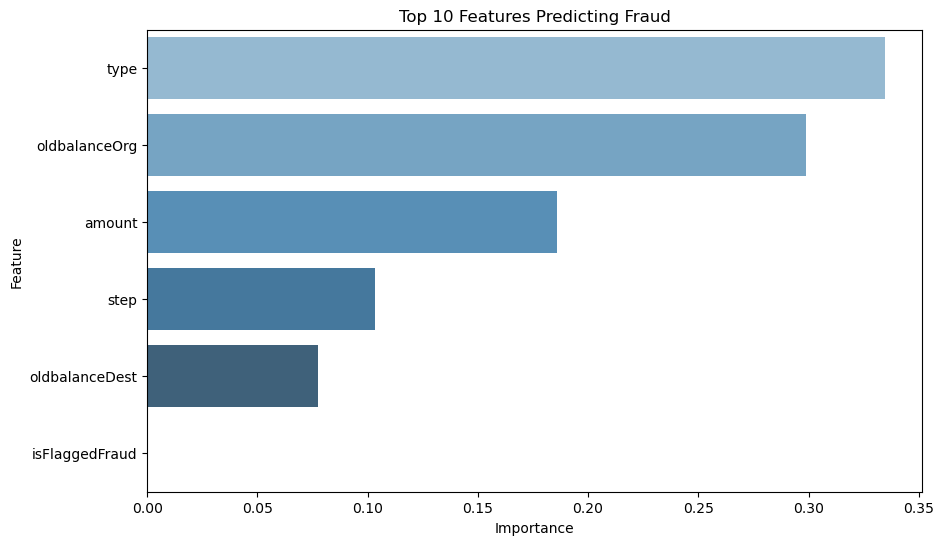

In [55]:
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to hold feature names and their importances
features = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
features = features.sort_values(by='Importance', ascending=False)

# Display the most important features
print("Top Features Predicting Fraud:")
print(features.head(10))  # Show top 10 features

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Top 10 Features Predicting Fraud")
sns.barplot(x='Importance', y='Feature', data=features.head(10), palette='Blues_d')
plt.show()


# 6 Do these factors make sense?
1.Transaction Type (type)-0.334872
Yes, it makes sense. The type of transaction is often a critical factor in determining fraud. Certain types of transactions (e.g., online payments, wire transfers) may be more susceptible to fraud than others (in-person transactions).
Fraudsters might prefer specific transaction types that allow them to move money quickly or anonymously. 
If a particular type of transaction is more commonly associated with fraud, the model will naturally consider it more important.
2.Original Balance of the Originating Account (oldbalanceOrg)- 0.298691
Yes. The balance of the originating account before the transaction can be a significant indicator of fraud.
Fraudsters might target accounts with specific balance patterns, such as draining an account with a high balance or performing transactions that leave the account almost empty.
Abnormal balance changes or patterns could signal suspicious activity.
3.Transaction Amount (amount)-0.185712
Yes. The transaction amount is a crucial factor in identifying fraudulent activity.
Large or unusual transaction amounts relative to typical spending patterns can trigger fraud detection systems. Fraudulent transactions often involve unusually large sums to maximize the impact of the fraud before the account holder notices or the account is locked.



# 7. What kind of prevention should be adopted while company update its infrastructure?
Prevention Measures for Infrastructure Updates
Data Encryption: Ensure all transaction data is encrypted to prevent unauthorized access.
Real-Time Monitoring: Implement real-time fraud detection systems that flag suspicious transactions.
Two-Factor Authentication: Increase security by requiring two-factor authentication for high-risk transactions.
Regular Audits: Perform regular security audits to identify and address potential vulnerabilities.


# 8. Assuming these actions have been implemented, how would you determine if they work?
To determine if the actions are working:
Monitoring Fraud Incidents: Track the number of fraudulent transactions detected and compare it with historical data.
Customer Feedback: Collect feedback from customers to see if they've noticed improvements in security.
Performance Metrics: Continuously monitor the precision, recall, and AUC-ROC scores of the model post-implementation. A decrease in false negatives would indicate improved fraud detection.
AB Testing: If feasible, conduct A/B testing by implementing changes in a subset of transactions and comparing the results to the control group.

# Conclusion
#Deployment and Monitoring
Model Deployment: Deploy the model as a web service or integrate it into the transaction processing pipeline for real-time detection.
Monitoring:Set up automated monitoring to track model performance and alert if accuracy decreases over time.
Retraining:Implement a retraining schedule to update the model periodically as new fraud patterns em
The model effectively predicts fraudulent transactions with a high degree of accuracy.
Feature importance analysis revealed critical factors that contribute to fraud detection.
